# build_bigram_from_scratch
this is a character level bigram language model. 
1. predict the next char based on the current char.
2. predict when the word ends.

# 1. bigram char counting

In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
l1 = [1,2,3]
l2 = [2,3]
list(zip(l1,l2))

[(1, 2), (2, 3)]

In [7]:
# bigram
# consecutive element
# we have additional information for start and end TOKEN

# a dict to count the bigram (ch1, ch2)
bigram_dict = {}

START_TOKEN = '<S>'
END_TOKEN = '<E>'

# check the first 3 words
for w in words[:3]:
    print ("word: ", w)
    # special start and end chr to tell which char is start and end
    # <S> and <E> are special
    chs = [START_TOKEN] + list(w) + [END_TOKEN]
    # create bigram with (i, i+1), the last char will not have a pair 
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        # if key does not exist, return count 0, else, +1
        bigram_dict[bigram] = bigram_dict.get(bigram, 0) + 1
        print (ch1, ch2)

word:  emma
<S> e
e m
m m
m a
a <E>
word:  olivia
<S> o
o l
l i
i v
v i
i a
a <E>
word:  ava
<S> a
a v
v a
a <E>


In [8]:
bigram_dict

{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<E>'): 3,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1,
 ('<S>', 'a'): 1,
 ('a', 'v'): 1,
 ('v', 'a'): 1}

In [9]:
# a dict to count the bigram (ch1, ch2)
bigram_dict = {}

START_TOKEN = '<S>'
END_TOKEN = '<E>'

for w in words:
    # special start and end chr to tell which char is start and end
    # <S> and <E> are special
    chs = [START_TOKEN] + list(w) + [END_TOKEN]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        # if key does not exist, return count 0, else, +1
        bigram_dict[bigram] = bigram_dict.get(bigram, 0) + 1

In [10]:
# bigram_dict now has all the stats
bigram_dict

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [11]:
# return tuples of key value, sort by value
sorted(bigram_dict.items(), key = lambda kv: kv[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

# 2. bigram char counting in a tensor

In [12]:
import torch

In [13]:
a = torch.zeros([3,5])
a

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [14]:
a.dtype

torch.float32

In [15]:
# with count, we need int
a = torch.zeros([3,5], dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [16]:
# change the value inside the tensor
a[1,4]=1 # row 1, col 4
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [17]:
a[1,3]+=1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [18]:
# we need to use dict from string to number -> embedding
# concat all char, set of string, remove duplicats
# we want list sorted
sorted(list(set(''.join(words))))

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [19]:
# we have char and special chars
# we have 28 X 28 array with counts
N = torch.zeros([28, 28], dtype=torch.int32)

In [20]:
# string to int mapping 1:1
chars = sorted(list(set(''.join(words))))
# string to int, int is the index 
stoi = {s:i for i, s in enumerate(chars)}
# manually map the 2 specials
stoi[START_TOKEN] = 26
stoi[END_TOKEN] = 27
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [21]:
for w in words:
    # special start and end chr to tell which char is start and end
    # <S> and <E> are special
    chs = [START_TOKEN] + list(w) + [END_TOKEN]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        # store the count at the corresponding index
        N[ix1, ix2] += 1 

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

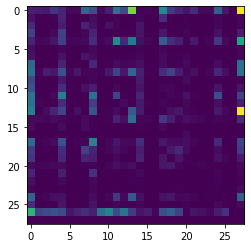

In [23]:
# visualize the N, Display data as an image, i.e., on a 2D regular raster.
plt.imshow(N)

In [24]:
# visualize N
# int (index) to string 
itos = {i:s for s, i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

In [25]:
N[3,3]

tensor(149, dtype=torch.int32)

In [26]:
N[3,3].item()

149

(-0.5, 27.5, 27.5, -0.5)

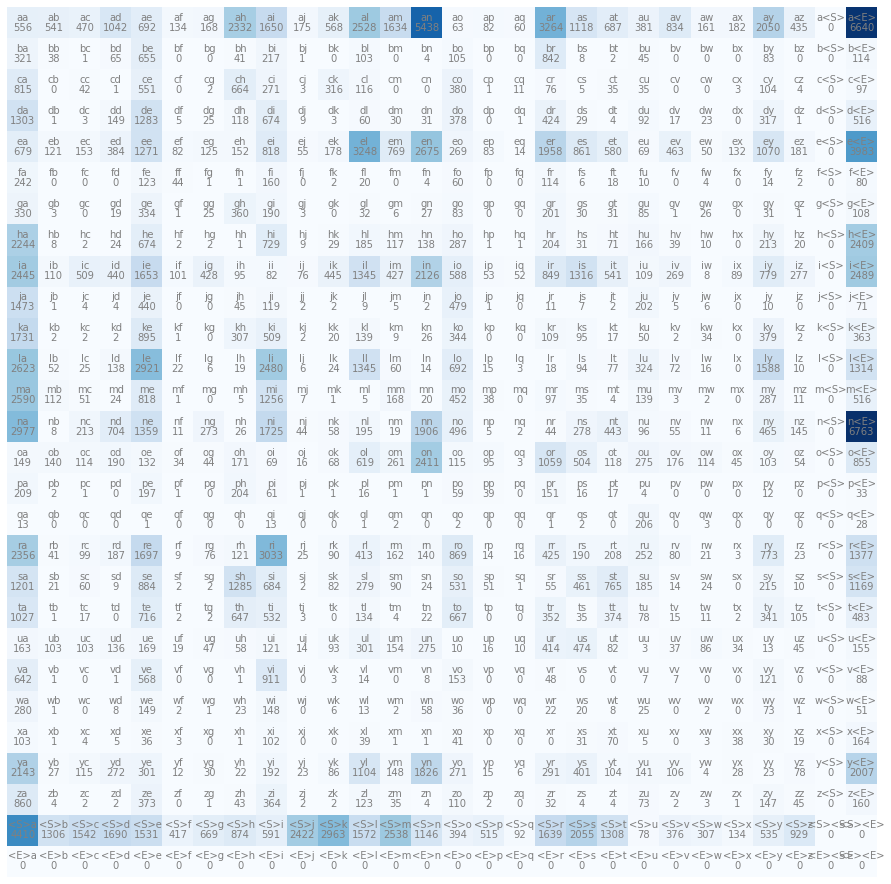

In [27]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        # get the text from index
        # add text to the graph
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i,j].item(), ha='center', va='top', color='gray')
plt.axis('off')

# <E> can never be the beginning, <S><E> is also not possible => we waste space

In [28]:
# fix special tokens with the same token for start and end

SPECIAL_TOKEN = '.'

N = torch.zeros([27,27], dtype=torch.int32)
# string to int mapping 1:1
chars = sorted(list(set(''.join(words))))
# make the special char index 0
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi[SPECIAL_TOKEN ] = 0
itos = {s:i for i, s in stoi.items()}

for w in words:
    chs = [SPECIAL_TOKEN] + list(w) + [SPECIAL_TOKEN]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        # store the count at the corresponding index
        N[ix1, ix2] += 1 

(-0.5, 26.5, 26.5, -0.5)

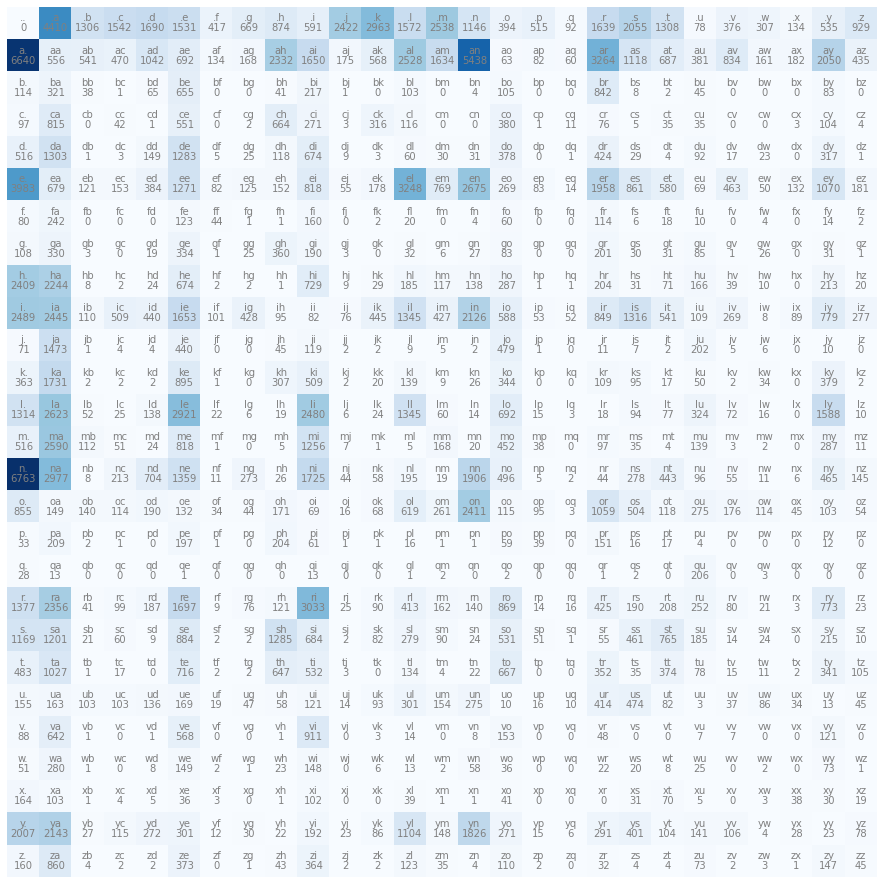

In [29]:
plt.figure(figsize=(16,16))
# this is the same as above
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        # add text to the graph
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i,j].item(), ha='center', va='top', color='gray')
plt.axis('off')

# this just makes the graph nice, because . is small 

# 3. compute bigram probability and sample from the probability

In [30]:
# if we start with dot, what's next?
# first row for .X, 1D array
N[0, :]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [31]:
for idx in range(27):
    char = itos[idx]
    print (char + " has count of", N[0, idx].item())

. has count of 0
a has count of 4410
b has count of 1306
c has count of 1542
d has count of 1690
e has count of 1531
f has count of 417
g has count of 669
h has count of 874
i has count of 591
j has count of 2422
k has count of 2963
l has count of 1572
m has count of 2538
n has count of 1146
o has count of 394
p has count of 515
q has count of 92
r has count of 1639
s has count of 2055
t has count of 1308
u has count of 78
v has count of 376
w has count of 307
x has count of 134
y has count of 535
z has count of 929


In [32]:
N[0, :].shape

torch.Size([27])

In [33]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [34]:
# normalize the count to get the probability distribution of all chars in a tensor
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [35]:
# sample from a distribution multi-normial , make it deterministic with Generateor 
g = torch.Generator().manual_seed(2147483647)
# randomly generate 3 random numbers from a uniform distribution [0,1]
p = torch.rand(3, generator=g)
p

tensor([0.7081, 0.3542, 0.1054])

In [36]:
torch.rand(2,3, generator=g)

tensor([[0.5996, 0.0904, 0.0899],
        [0.8822, 0.9887, 0.0080]])

In [37]:
# we need to normalize the sampled number! 
p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [38]:
# sample from a distribution multi-normial , make it deterministic with Generateor 
# draw 20 samples with replacement, there are 3 samples, 60% is 0, 30% is 1, 10% is 0

g = torch.Generator().manual_seed(2147483647)
torch.multinomial(p, num_samples=50, replacement=True, generator=g)

tensor([1, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 0])

In [39]:
# we use the same seed to sample index from the distribution in the 1st row 

p = N[0].float()
p = p/p.sum()
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
ix

13

In [40]:
# this is the first char following .
itos[ix]

'm'

In [41]:
# sample more char in the seq, and look for the row that starts with m
# ma, mb, mc ...

g = torch.Generator().manual_seed(2147483647)

ix = 0
while True:
    p = N[ix].float()
    p = p/p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    print (itos[ix])
    # this is the index to be the next
    if ix == 0:
        # we sampled the start or the stop token (which is the same .)
        break

m
o
r
.


In [42]:
p.shape

torch.Size([27])

In [43]:
# untrained probability, uniform 
g = torch.Generator().manual_seed(2147483647)

for i in range (20):
    out = []
    ix = 0
    while True:
        p = torch.ones(27)/27.0
        # uniform distribution
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    
    # this is a randomly generated word with uniform prob distribution 
    print (''.join(out))

qvsaayxbqrqmyqwuznivanukotdjvdhd.
qnoymtzduqkatdetkpfjdgigvlejfkrsqlwnirghhzwlu.
idcx.
cekmzucjnjoeovjvrggqrjr.
cfbhabkslpokc.
xtxwbpmknuusxdgzfexhwqpldpdnwzvkyxsqjforqqpfxstwkfoufhvwfhmsuyyotvcvvqpfcbydjcouhkajkhqnnpqmmllaordqy.
gszpw.
zlgijinangzzuulsyvqrufuawavsdbnwvlmrypvgrsfgpshgnmwafqmsjdvbhngvoiigxhkwdltrdkwnagzyknqv.
lfstdqigvncdoidetsukgdp.
cfpjsxeqjcsmjwguzes.
woflfjxflylgbegpjdpovdtw.
dlzysqtrbhxhcdneiuum.
xtyslfbmaboaanyjpojuujflcsaucqcgtjmlzqtbaisvxrtgupkppigxudejdzsroqeigovuxmvt.
jlxfolkozci.
tkhdivkdifaxcevlpktkwwvuxlymtwylgpzauwdvxfvbooflddphmjeomjgjcqeqwt.
.
wlxclcjbm.
quuyijtnzmycshclormjyrerqslomdrlbuwqnlmitbrmqhtbdwbyvlsmwnborwcdhjotezwnsxuvffvinrmedelubhdfgtavxqfgmnyqrygyevxaapbjtnwfnwewqxerdytttvfo.
iauarz.
tynoqkyp.


In [44]:
# "trained" probability distribution from counting 

g = torch.Generator().manual_seed(2147483647)

for i in range (20):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p/p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    # bigram launguage is bad lol
    print (''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.


## sum values in tensor

In [45]:
x = torch.tensor([[1,2],[3,4]])
x.shape

torch.Size([2, 2])

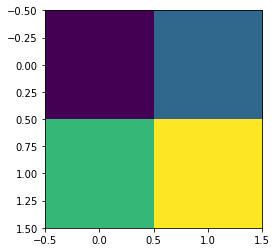

In [46]:
plt.imshow(x)

In [47]:
x.sum()

tensor(10)

In [48]:
# sum by column
x.sum(0)

tensor([4, 6])

In [49]:
# sum by row
x.sum(1)

tensor([3, 7])

In [50]:
x.sum(1).shape

torch.Size([2])

In [51]:
x.sum(1, keepdim=True).shape

torch.Size([2, 1])

## broadcasting semantics

https://pytorch.org/docs/stable/notes/broadcasting.html

In [52]:
x.shape

torch.Size([2, 2])

In [53]:
x.sum(1).shape

torch.Size([2])

In [54]:
x.sum(1)

tensor([3, 7])

In [55]:
res = x/x.sum(1)
res.shape

torch.Size([2, 2])

In [56]:
x

tensor([[1, 2],
        [3, 4]])

In [57]:
wrong_sum_broadcasted = torch.tensor([[3, 7], [3, 7]])
x/wrong_sum_broadcasted

tensor([[0.3333, 0.2857],
        [1.0000, 0.5714]])

In [58]:
# [2,2]
# [  2], wrong
res

tensor([[0.3333, 0.2857],
        [1.0000, 0.5714]])

In [59]:
res = x/x.sum(1, keepdim=True)
res.shape

torch.Size([2, 2])

In [60]:
x.sum(1, keepdim=True).shape

torch.Size([2, 1])

In [61]:
x.sum(1, keepdim=True)
# should be [[3],[7]], not [3,7]

tensor([[3],
        [7]])

In [62]:
res

tensor([[0.3333, 0.6667],
        [0.4286, 0.5714]])

In [63]:
correct_sum_broadcasted = torch.tensor([[3, 3], [7, 7]])
x/correct_sum_broadcasted

tensor([[0.3333, 0.6667],
        [0.4286, 0.5714]])

## compute bigram probability matrix and sample from the probability

In [64]:
smoothing_factor = 1
# the bigger smoothing_factor is, the closer P is to uniform 

P = (N+smoothing_factor).float()
P = P/P.sum(1, keepdim=True)

In [65]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print (''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.


# 4. evaluate the bigram performance with maximum likelihood estimation

In [66]:
# P is the parameter of bigram launguage model
# evaluate the quality of the model

log_likelihood = 0.0
n=0

for w in words:
    chs = [SPECIAL_TOKEN] + list(w) + [SPECIAL_TOKEN]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        # summarize the stats model into a single number
        # MLE: maximum likehood estimation -> log likelihood
        # wolframalpha.com
        # log(x) from 0 to 1
        # log(a*b*c) => log(a) + log(b) + log(c)
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
#         print(f'{ch1}{ch2}: {prob:.4f} {logprob: .4f}')
        
# we just add all log prob
print (f'{log_likelihood}')

# negative_log_likelihood
nll = -log_likelihood
# the lowest is 0, the higher the value, the worse
print(f'nll={nll}')
# make it avearge instead of sum. hmmmm normalize
# THIS IS THE SMALLED NEGATIVE LOG LOSS WE CAN ACHIEVE FROMDATA 
print(f'nll/n={nll/n}')

-559951.5625
nll=559951.5625
nll/n=2.4543561935424805


In [67]:
# look at the probability of the pair 
# if everything is the same, uniform distribution of all pairs 
# known words is training set
1/27

0.037037037037037035

In [68]:
# evaluate the prob of a single word, not likely!
# jq is unlikely, just get 0, loglikilihood does not apply

In [69]:
# bigram combination
TEST_WORD = 'ju'

log_likelihood = 0.0
n=0

for w in [TEST_WORD]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob: .4f}')
        
print (f'{log_likelihood}')

nll = -log_likelihood
print(f'nll={nll}')
print(f'nll/n={nll/n}')

.j: 0.0756 -2.5826
ju: 0.0694 -2.6685
u.: 0.0493 -3.0091
-8.260233879089355
nll=8.260233879089355
nll/n=2.753411293029785


In [70]:
# bigram combination, more unlikely than ju
TEST_WORD = 'juq'

log_likelihood = 0.0
n=0

for w in [TEST_WORD]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob: .4f}')
        
print (f'{log_likelihood}')

nll = -log_likelihood
print(f'nll={nll}')
print(f'nll/n={nll/n}')

.j: 0.0756 -2.5826
ju: 0.0694 -2.6685
uq: 0.0035 -5.6611
q.: 0.0970 -2.3331
-13.245343208312988
nll=13.245343208312988
nll/n=3.311335802078247


# 5. train a neural net for bigram 

goal is to 
- maximize the likelihood of the data  w.r.t. model parameters (stat modeling), the probability learned
- equivalent to maximize log likelihood
- equivalent to minimize negative log likelihood
- equivalent to minimize average negative log likelihood

In [71]:
SPECIAL_TOKEN

'.'

In [72]:
# create training set of all bigrams

xs, ys = [], []

for w in words[:1]:
    chs = [SPECIAL_TOKEN] + list(w) + [SPECIAL_TOKEN]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print (ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

# torch.Tensor or torch.tensor 
# hmmm
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [73]:
xs.dtype

torch.int64

In [74]:
xs

tensor([ 0,  5, 13, 13,  1])

In [75]:
ys

tensor([ 5, 13, 13,  1,  0])

In [76]:
# input 0, output is 5
# input 5, output is 13
# ...

# use one hot encodding to pass in integer tensor

import torch.nn.functional as F
# it will know the desired output is 27
xenc = F.one_hot(xs, num_classes=27)
xenc

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

In [77]:
xenc.shape

torch.Size([5, 27])

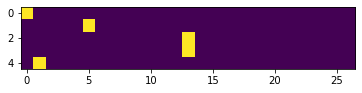

In [78]:
plt.imshow(xenc)
# each row is one-hot, a bit is 1, everthing else is 0

In [79]:
# still int, one_hot
# cannot change it to dtype float 32
xenc.dtype

torch.int64

In [80]:
# cast this tensor to float 
xenc = xenc.float()
xenc.dtype

torch.float32

In [81]:
W = torch.randn??

In [ ]:
W = torch.randn

In [82]:
W = torch.randn

In [83]:
W = torch.randn

In [84]:
# normal distribution (0,1)
W = torch.randn([27,1])
W

tensor([[ 1.4877],
        [-1.4306],
        [ 1.4439],
        [ 0.7164],
        [-3.1612],
        [ 0.7941],
        [-1.6766],
        [-1.3760],
        [-0.2385],
        [-0.5276],
        [-0.7115],
        [ 0.2031],
        [-0.1815],
        [ 0.5241],
        [-0.8217],
        [ 0.7072],
        [-0.8245],
        [-0.5039],
        [-1.3716],
        [-0.0141],
        [ 0.5177],
        [ 0.4381],
        [ 0.2916],
        [-2.1168],
        [-0.0626],
        [-0.2190],
        [-1.7570]])

## matrix multiplication

In [85]:
# X*W matrix multiplication
# [5, 27] @ [27, 1] = [5, 1]

xenc @ W

# AB = A.mm(B)
# AB = torch.mm(A, B)
# AB = torch.matmul(A, B)
# AB = A @ B  # Python 3.5+ only

tensor([[ 1.4877],
        [ 0.7941],
        [ 0.5241],
        [ 0.5241],
        [-1.4306]])

In [86]:
W = torch.randn([27,27])
W
# 1st hidden layer, 27 neurons, each gets from 27 input

tensor([[ 6.7366e-01, -1.6251e+00,  3.3043e-02,  1.6559e+00, -5.6355e-01,
          6.7864e-01,  8.1665e-02,  7.5858e-01,  1.5930e+00, -6.3549e-03,
         -1.6644e+00, -2.5768e+00, -1.2786e+00,  3.3031e-01, -4.5170e-01,
         -7.2214e-01, -1.8827e+00,  7.8235e-01,  1.1566e+00, -8.4164e-01,
          8.4719e-01, -6.1289e-01, -6.2672e-01, -1.5248e+00,  1.8524e-01,
         -5.9706e-01,  4.5993e-01],
        [-1.9348e+00, -7.5474e-01,  1.2555e+00,  1.3161e+00, -4.5045e-01,
         -5.7690e-01,  2.3186e-01, -2.8714e-01, -1.5449e+00, -1.2750e+00,
          7.4916e-01,  6.0161e-01,  7.0086e-01, -1.0388e+00, -5.5108e-01,
          4.3476e-01, -1.0778e-01,  5.5963e-01, -5.0879e-01, -7.0088e-01,
          5.8301e-01, -1.5363e+00, -9.5728e-01,  1.1673e+00, -4.4890e-01,
         -1.4149e+00,  2.4459e-01],
        [ 8.5552e-01,  1.9392e-01,  5.9796e-01,  2.5886e-01, -1.0865e+00,
         -4.1909e-01, -2.1069e+00, -4.0672e-01, -1.5447e-01, -3.1003e-01,
         -2.6841e-01, -1.7356e+00,  8.09

In [87]:
# [27, 27] output
xenc @ W

tensor([[ 0.6737, -1.6251,  0.0330,  1.6559, -0.5635,  0.6786,  0.0817,  0.7586,
          1.5930, -0.0064, -1.6644, -2.5768, -1.2786,  0.3303, -0.4517, -0.7221,
         -1.8827,  0.7824,  1.1566, -0.8416,  0.8472, -0.6129, -0.6267, -1.5248,
          0.1852, -0.5971,  0.4599],
        [ 0.1869, -0.2464, -2.6120,  0.6994,  1.1110,  1.4868, -0.3098,  1.1148,
         -0.3645, -0.2988,  0.7282, -0.7637, -0.9729,  0.3362, -1.1741, -0.9033,
          0.1320, -0.9397, -0.0878, -0.0167, -0.1607,  1.1609,  1.1186,  1.6045,
         -0.7933,  0.2588, -2.3090],
        [ 1.7277,  0.0104,  0.8252,  0.5500,  1.2095,  0.9505,  0.5391, -0.8184,
          1.2746,  0.4598,  0.1190,  0.4411,  1.4398, -0.8819, -1.7236,  0.3355,
         -1.0976,  1.2797, -0.1502, -1.0081,  0.3353,  0.7015, -0.3898, -1.5657,
         -1.4764, -1.7376,  0.7125],
        [ 1.7277,  0.0104,  0.8252,  0.5500,  1.2095,  0.9505,  0.5391, -0.8184,
          1.2746,  0.4598,  0.1190,  0.4411,  1.4398, -0.8819, -1.7236,  0.3355

In [88]:
# dot product of the 3rd input, for the 13th neuron weight? 

(xenc @ W) [3,13]

tensor(-0.8819)

In [89]:
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [90]:
W[:,13]

tensor([ 0.3303, -1.0388,  0.5564, -0.2065,  0.1124,  0.3362, -0.3239, -0.6988,
         0.1058, -0.0272,  0.7911,  0.1986,  0.9778, -0.8819,  1.1232, -1.1845,
         0.5400, -0.1844, -1.1252,  1.3079, -0.4389, -0.3442,  0.2396, -1.9063,
         0.9393,  0.3081, -1.0447])

In [91]:
# dot product: element wise and then sum up
(xenc[3] * W[:,13]).sum()

tensor(-0.8819)

In [92]:
# xenc: input layer
# W: 1st hidden layer , single layer lol
# output -> prob, weights come from randn
# we want count, which then can be normalized to get probability
# W = log count
# log count => exp (x) to get count 

# element wise make it bigger exponetiate
(xenc @ W).exp()

tensor([[1.9614, 0.1969, 1.0336, 5.2378, 0.5692, 1.9712, 1.0851, 2.1352, 4.9183,
         0.9937, 0.1893, 0.0760, 0.2784, 1.3914, 0.6365, 0.4857, 0.1522, 2.1866,
         3.1791, 0.4310, 2.3331, 0.5418, 0.5343, 0.2177, 1.2035, 0.5504, 1.5840],
        [1.2056, 0.7816, 0.0734, 2.0125, 3.0375, 4.4231, 0.7336, 3.0489, 0.6945,
         0.7417, 2.0713, 0.4659, 0.3780, 1.3997, 0.3091, 0.4052, 1.1411, 0.3907,
         0.9159, 0.9834, 0.8516, 3.1928, 3.0605, 4.9752, 0.4524, 1.2954, 0.0994],
        [5.6278, 1.0104, 2.2824, 1.7333, 3.3519, 2.5870, 1.7144, 0.4411, 3.5774,
         1.5837, 1.1264, 1.5545, 4.2200, 0.4140, 0.1784, 1.3986, 0.3337, 3.5957,
         0.8605, 0.3649, 1.3983, 2.0169, 0.6772, 0.2090, 0.2285, 0.1759, 2.0390],
        [5.6278, 1.0104, 2.2824, 1.7333, 3.3519, 2.5870, 1.7144, 0.4411, 3.5774,
         1.5837, 1.1264, 1.5545, 4.2200, 0.4140, 0.1784, 1.3986, 0.3337, 3.5957,
         0.8605, 0.3649, 1.3983, 2.0169, 0.6772, 0.2090, 0.2285, 0.1759, 2.0390],
        [0.1445, 0.4701,

In [93]:
logits = xenc @ W # log counts
counts = logits.exp() # eq to the N matrix 

probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0544, 0.0055, 0.0287, 0.1452, 0.0158, 0.0546, 0.0301, 0.0592, 0.1363,
         0.0275, 0.0052, 0.0021, 0.0077, 0.0386, 0.0176, 0.0135, 0.0042, 0.0606,
         0.0881, 0.0119, 0.0647, 0.0150, 0.0148, 0.0060, 0.0334, 0.0153, 0.0439],
        [0.0308, 0.0200, 0.0019, 0.0514, 0.0776, 0.1130, 0.0187, 0.0779, 0.0177,
         0.0190, 0.0529, 0.0119, 0.0097, 0.0358, 0.0079, 0.0104, 0.0292, 0.0100,
         0.0234, 0.0251, 0.0218, 0.0816, 0.0782, 0.1271, 0.0116, 0.0331, 0.0025],
        [0.1259, 0.0226, 0.0511, 0.0388, 0.0750, 0.0579, 0.0384, 0.0099, 0.0800,
         0.0354, 0.0252, 0.0348, 0.0944, 0.0093, 0.0040, 0.0313, 0.0075, 0.0804,
         0.0193, 0.0082, 0.0313, 0.0451, 0.0151, 0.0047, 0.0051, 0.0039, 0.0456],
        [0.1259, 0.0226, 0.0511, 0.0388, 0.0750, 0.0579, 0.0384, 0.0099, 0.0800,
         0.0354, 0.0252, 0.0348, 0.0944, 0.0093, 0.0040, 0.0313, 0.0075, 0.0804,
         0.0193, 0.0082, 0.0313, 0.0451, 0.0151, 0.0047, 0.0051, 0.0039, 0.0456],
        [0.0046, 0.0149,

In [94]:
# for each input, we have a prob distribution of all possible output
probs.shape

torch.Size([5, 27])

In [95]:
probs[0]
# nn assignment of how likely each char will come next
# with W tuned, the output prob will change 
# we backpropogate with ys

tensor([0.0544, 0.0055, 0.0287, 0.1452, 0.0158, 0.0546, 0.0301, 0.0592, 0.1363,
        0.0275, 0.0052, 0.0021, 0.0077, 0.0386, 0.0176, 0.0135, 0.0042, 0.0606,
        0.0881, 0.0119, 0.0647, 0.0150, 0.0148, 0.0060, 0.0334, 0.0153, 0.0439])

## forward pass

In [96]:
xs

tensor([ 0,  5, 13, 13,  1])

In [97]:
ys

tensor([ 5, 13, 13,  1,  0])

In [98]:
probs.shape

torch.Size([5, 27])

In [99]:
g = torch.Generator().manual_seed(2147483647)
# 27 neuron weight, each neuron receives 27 input
# the loss depends on W
W = torch.randn((27,27), generator=g)
xenc = F.one_hot(xs, num_classes=27).float()
# forward pass with the input
logits = xenc @ W # log counts

# softmax
counts = logits.exp() # eq to the N matrix 
probs = counts / counts.sum(1, keepdims=True)

# we can back propagae through W and exp (softmax)

# calculate nll
nlls = torch.zeros(5)

for i in range(5):
    # i-th bigram
    x = xs[i].item()
    y = ys[i].item()
    print('--------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})')
    print('input to the neural net:', x)
    print('output progabilities from the neural net:', probs[i])
    print('label (the actual next char):', y)
    # the probability of the real label
    p = probs[i, y]
    print('probability assigned by the neural net to the correct next char', p.item())
    logp = torch.log(p)
    print ('log likelihood:', logp.item())
    nll = -logp
    print ('negative log likelihood:', nll.item())
    nlls[i] = nll
    
print('======================')
print('average negative log likelihood, i.e. loss = ', nlls.mean().item())

# the network currently thinsk 0.012 prob in generating e after .

--------
bigram example 1: .e (indexes 0, 5)
input to the neural net: 0
output progabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (the actual next char): 5
probability assigned by the neural net to the correct next char 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5, 13)
input to the neural net: 5
output progabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (the actual next char): 13
probability assigned by the neural net to the correct next cha

## backpropagation
start with a random guess, commit to this one, and update W with gradient
single number calculation loss 

In [100]:
g = torch.Generator().manual_seed(2147483647)
# 27 neuron weight, each neuron receives 27 input
# the loss depends on W
W = torch.randn((27,27), generator=g)
xenc = F.one_hot(xs, num_classes=27).float()
# forward pass with the input
logits = xenc @ W # log counts

# softmax
counts = logits.exp() # eq to the N matrix 
probs = counts / counts.sum(1, keepdims=True)

In [101]:
# we are interested in the index 5 for the 1nd example
probs[0, 5]

tensor(0.0123)

In [102]:
# we are interested in the index 13 for the 2nd example
probs[1, 13]

tensor(0.0181)

In [103]:
# we need to pass the index to get probs
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [104]:
ys

tensor([ 5, 13, 13,  1,  0])

In [105]:
# get [0,5], [1,13], [2,13], [3,1], [4,0] from probs
# the forward pass of the correct char
probs[torch.arange(5), ys]

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150])

In [106]:
loss = - probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7693)

In [107]:
# we get the forward pass loss
# now we will do backward pass

g = torch.Generator().manual_seed(2147483647)
# 27 neuron weight, each neuron receives 27 input
# the loss depends on W
# need to require grad = True to track the gradient 
W = torch.randn((27,27), generator=g, requires_grad=True)
xenc = F.one_hot(xs, num_classes=27).float()
# forward pass with the input
logits = xenc @ W # log counts

# softmax
counts = logits.exp() # eq to the N matrix 
probs = counts / counts.sum(1, keepdims=True)
loss = - probs[torch.arange(5), ys].log().mean()

In [108]:
loss.item()

3.7693049907684326

In [109]:
# 1. reset all gradients to 0, or none (more efficient)
W.grad = None

# 2. backward, this build a computational grad with all the op
loss.backward()

In [110]:
W

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9643e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2843e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4039e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0730e-02,
          2.4968e+00,  2.4448e+00],
        [-6.7006e-01, -1.2199e+00,  3.0314e-01, -1.0725e+00,  7.2762e-01,
          5.1114e-02,  1.3095e+00, -8.0220e-01, -8.5042e-01, -1.8068e+00,
          1.2523e+00, -1.2256e+00,  1.2165e+00, -9.6478e-01, -2.3211e-01,
         -3.4762e-01,  3.3244e-01, -1.3263e+00,  1.1224e+00,  5.9641e-01,
          4.5846e-01,  5.4011e-02, -1.7400e+00,  1.1560e-01,  8.0319e-01,
          5.4108e-01, -1.1646e+00],
        [ 1.4756e-01, -1.0006e+00,  3.8012e-01,  4.7328e-01, -9.1027e-01,
         -7.8305e-01,  1.3506e-01, -2.1161e-01, -1.0406e+00, -1.5367e+00,
          9.3743e-01, -8.8303e-01,  1.74

In [111]:
W.grad
# the influence of that weight on the loss function
# positive 0.0121, means the loss will be bigger 

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [112]:
W.grad.shape

torch.Size([27, 27])

In [113]:
# use W.grad to update the weight
# we only have 1 param

W.data += -0.2 * W.grad

In [114]:
W = torch.randn((27,27), generator=g, requires_grad=True)
xenc = F.one_hot(xs, num_classes=27).float()
# forward pass with the input
logits = xenc @ W # log counts

# softmax
counts = logits.exp() # eq to the N matrix 
probs = counts / counts.sum(1, keepdims=True)
loss = - probs[torch.arange(5), ys].log().mean()
# loss will get smaller 
loss.item()

2.8476314544677734

In [115]:
# ======== optimize with gradient descent ======== 

learning_rate = 0.5

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)
xenc = F.one_hot(xs, num_classes=27).float()

for i in range(50):
    # forward pass with the input
    logits = xenc @ W # log counts

    # softmax
    counts = logits.exp() # eq to the N matrix 
    probs = counts / counts.sum(1, keepdims=True)
    loss = - probs[torch.arange(5), ys].log().mean()
    
    W.grad = None
    loss.backward()
    
    # W upgrade
    W.data += -learning_rate * W.grad
    
    print (loss.item())

3.7693049907684326
3.6690573692321777
3.5698916912078857
3.47186541557312
3.375035047531128
3.2794578075408936
3.185190439224243
3.092288017272949
3.0008041858673096
2.9107913970947266
2.8222999572753906
2.735377788543701
2.650071859359741
2.566426992416382
2.484485149383545
2.4042882919311523
2.3258750438690186
2.249284029006958
2.1745505332946777
2.101710319519043
2.0307953357696533
1.9618362188339233
1.8948619365692139
1.8298975229263306
1.7669651508331299
1.7060835361480713
1.6472663879394531
1.5905228853225708
1.5358566045761108
1.4832653999328613
1.4327411651611328
1.3842686414718628
1.3378269672393799
1.29338800907135
1.2509180307388306
1.2103769779205322
1.1717193126678467
1.134894609451294
1.0998480319976807
1.0665206909179688
1.034851312637329
1.0047760009765625
0.9762290716171265
0.9491443634033203
0.9234551191329956
0.8990948796272278
0.8759980201721191
0.8541001081466675
0.8333381414413452
0.8136513829231262


In [116]:
# ======== optimize with gradient descent with all words ======== 

xs, ys = [], []

for w in words:
    chs = [SPECIAL_TOKEN] + list(w) + [SPECIAL_TOKEN]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

# number of training data, xs.shape[0]
num = xs.nelement()

# we can see as we change learning rate, it may blow up
learning_rate = 50

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

xenc = F.one_hot(xs, num_classes=27).float()

for i in range(100):
    # forward pass with the input
    logits = xenc @ W # log counts

    # softmax
    counts = logits.exp() # eq to the N matrix 
    probs = counts / counts.sum(1, keepdims=True)
    loss = - probs[torch.arange(num), ys].log().mean()
    
    W.grad = None
    loss.backward()
    
    # W upgrade
    W.data += -learning_rate * W.grad
    
    # when we optimize by counting, the negative log likelihood is 2.47
    # we achieve the same results with gradient descent without counting the bigrams 
    print (loss.item())

3.758953332901001
3.371100664138794
3.1540427207946777
3.020373582839966
2.927711009979248
2.8604021072387695
2.8097290992736816
2.7701022624969482
2.7380728721618652
2.711496353149414
2.6890032291412354
2.6696884632110596
2.65293025970459
2.638277292251587
2.6253881454467773
2.613990545272827
2.60386323928833
2.5948219299316406
2.5867116451263428
2.579403877258301
2.572789192199707
2.5667762756347656
2.5612878799438477
2.5562586784362793
2.551633596420288
2.547365665435791
2.5434155464172363
2.5397486686706543
2.5363364219665527
2.5331544876098633
2.5301806926727295
2.5273966789245605
2.5247862339019775
2.522334575653076
2.520029067993164
2.517857551574707
2.515810489654541
2.513878345489502
2.512052059173584
2.510324001312256
2.5086867809295654
2.5071346759796143
2.5056610107421875
2.5042612552642822
2.5029289722442627
2.5016608238220215
2.5004520416259766
2.4992988109588623
2.498197317123413
2.497144937515259
2.4961376190185547
2.495173215866089
2.4942495822906494
2.49336314201355
2

# 6. regularization

In counting, we use N+1 to smooth the count matrix so that bigram with 0 count will have non-zero probability. The bigger we set the smoothing factor, the more uniform the probability is.

In NN, we smooth the W by penalizing bigger W to avoid bigger W having too much weight on the model. Regularization helps the model to generalize better so that it performs better with unseen data. By incentivizing smaller weights, regularization essentially makes the model "unlearn" and introduces uncertainty or randomness to the learning algorithm. 

In [117]:
# ======== optimize with gradient descent with L2 reg ======== 

xs, ys = [], []

for w in words:
    chs = [SPECIAL_TOKEN] + list(w) + [SPECIAL_TOKEN]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

# number of training data xs.shape[0]
num = xs.nelement()

# we can see as we change learning rate, it may blow up
learning_rate = 50

# how much do we penalize bigger W
regularization_strength = 0.01

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

xenc = F.one_hot(xs, num_classes=27).float()

for i in range(100):
    # forward pass with the input
    logits = xenc @ W # log counts

    # softmax
    counts = logits.exp() # eq to the N matrix 
    probs = counts / counts.sum(1, keepdims=True)
    
    # penalize for bigger W, bigger W, bigger loss ; add a gravity force to pull W to 0
    L2_reg = (W**2)
    # L1_reg: absolute value
    loss = - probs[torch.arange(num), ys].log().mean() + regularization_strength * L2_reg.mean()
    
    W.grad = None
    loss.backward()
    
    # W upgrade
    W.data += -learning_rate * W.grad
    
    print (loss.item())

3.768618583679199
3.3788065910339355
3.16109037399292
3.0271859169006348
2.9344840049743652
2.867231607437134
2.8166542053222656
2.777146100997925
2.745253801345825
2.7188305854797363
2.696505308151245
2.6773722171783447
2.6608052253723145
2.6463515758514404
2.633664846420288
2.622471570968628
2.6125476360321045
2.6037068367004395
2.595794916152954
2.5886807441711426
2.5822560787200928
2.576429843902588
2.5711236000061035
2.566272735595703
2.5618226528167725
2.5577263832092285
2.5539441108703613
2.5504424571990967
2.5471925735473633
2.5441696643829346
2.5413525104522705
2.538721799850464
2.536262035369873
2.5339579582214355
2.5317976474761963
2.5297679901123047
2.527860164642334
2.526063919067383
2.5243704319000244
2.522773027420044
2.521263837814331
2.519836902618408
2.5184857845306396
2.5172054767608643
2.5159904956817627
2.5148372650146484
2.5137407779693604
2.51269793510437
2.511704921722412
2.5107579231262207
2.509854555130005
2.5089924335479736
2.5081682205200195
2.50738048553466

# 7. use the trained NN to generate new names

In [118]:
# with count matrix

g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if (ix==0):
            break
    print (''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [119]:
# with NN
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        # prepare input data with the same encoding
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
       
        # forward pass
        logits = xenc @ W
        # softmax
        counts = logits.exp()
        p = counts/counts.sum(1, keepdims=True)
        
        # sample using predicted p
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if (ix==0):
            break
    print (''.join(out))

mor.
axx.
minaymoryles.
kondmaisah.
anchthizarie.
